<a href="https://colab.research.google.com/github/Ishq01/cs562/blob/main/562_Result_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("results_with_baseline.csv")

# Extract final-epoch results
final = df[df["epoch"] == df["epochs_total"]]

Plot 1 — EM/F1 vs Epoch (per σ, per C)

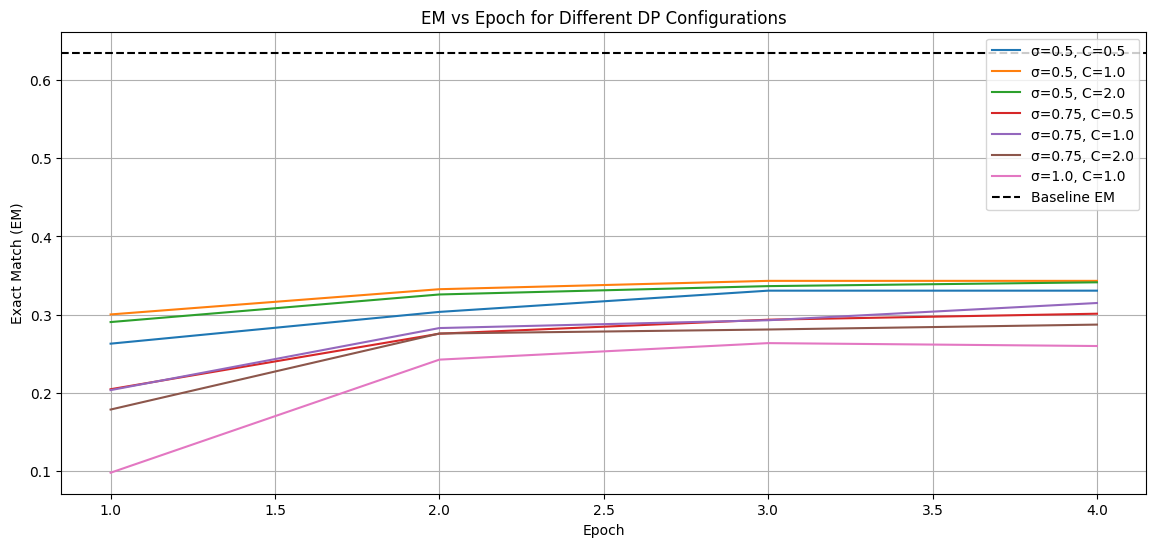

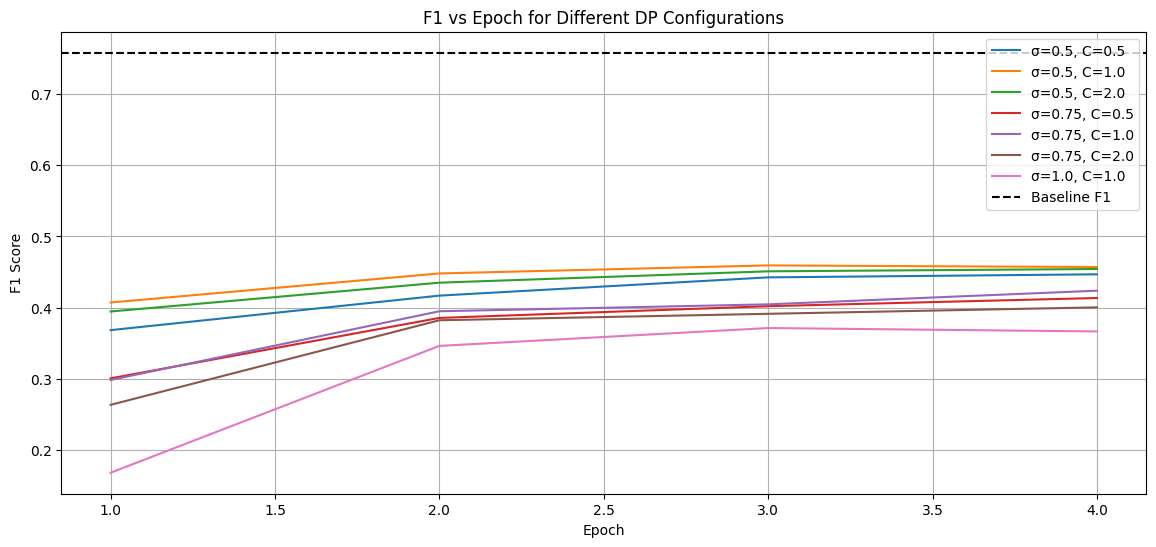

In [ ]:
def plot_em_f1_vs_epoch(df):
    configs = df.groupby(["sigma", "C"])

    plt.figure(figsize=(14, 6))

    for (sigma, C), group in configs:
        plt.plot(group["epoch"], group["em"], label=f"σ={sigma}, C={C}")

    plt.axhline(0.6347, color="black", linestyle="--", label="Baseline EM")
    plt.title("EM vs Epoch for Different DP Configurations")
    plt.xlabel("Epoch")
    plt.ylabel("Exact Match (EM)")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(14, 6))
    for (sigma, C), group in configs:
        plt.plot(group["epoch"], group["f1"], label=f"σ={sigma}, C={C}")

    plt.axhline(0.7578, color="black", linestyle="--", label="Baseline F1")
    plt.title("F1 vs Epoch for Different DP Configurations")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid()
    plt.show()

plot_em_f1_vs_epoch(df)


Plot 2 — EM vs ε (privacy–utility curve)

/tmp/ipython-input-1839523500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_df["sigma"] = dp_df["sigma"].astype(float)
/tmp/ipython-input-1839523500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_df["C"] = dp_df["C"].astype(float)


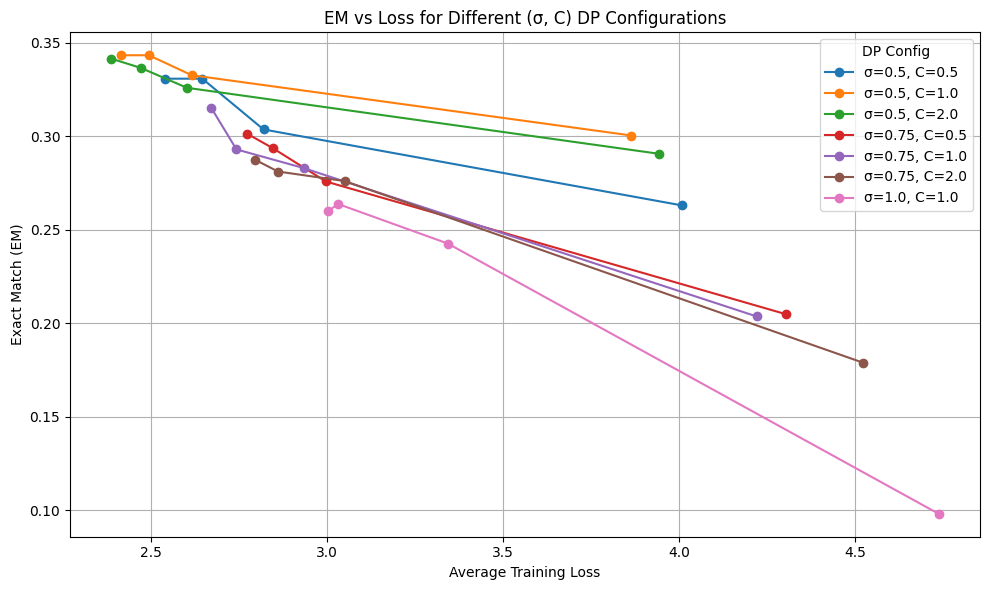

In [ ]:
# Keep only DP runs
dp_df = df.dropna(subset=["sigma", "C", "avg_loss", "em"])

dp_df["sigma"] = dp_df["sigma"].astype(float)
dp_df["C"] = dp_df["C"].astype(float)

# Create the plot
plt.figure(figsize=(10, 6))

for (sigma, C), group in dp_df.groupby(["sigma", "C"]):
    group_sorted = group.sort_values("avg_loss")

    plt.plot(
        group_sorted["avg_loss"],
        group_sorted["em"],
        marker="o",
        label=f"σ={sigma}, C={C}"
    )

plt.xlabel("Average Training Loss")
plt.ylabel("Exact Match (EM)")
plt.title("EM vs Loss for Different (σ, C) DP Configurations")
plt.grid(True)
plt.legend(title="DP Config")
plt.tight_layout()
plt.show()


Plot 3 — F1 vs ε

/tmp/ipython-input-2087971726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_df["sigma"] = dp_df["sigma"].astype(float)
/tmp/ipython-input-2087971726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_df["C"] = dp_df["C"].astype(float)


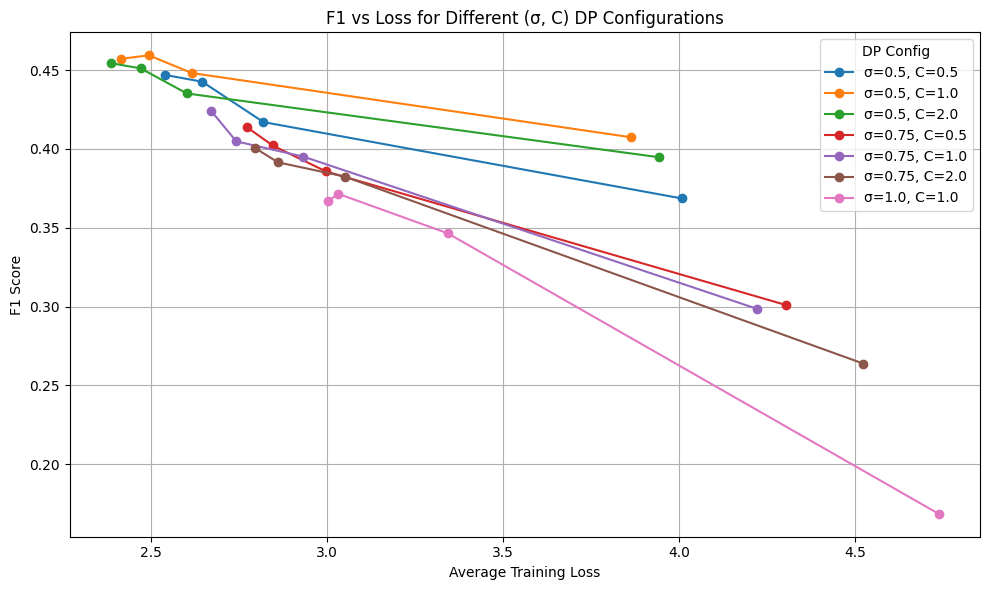

In [ ]:
# Keep only DP rows
dp_df = df.dropna(subset=["sigma", "C", "avg_loss", "f1"])

# Ensuring proper numeric types
dp_df["sigma"] = dp_df["sigma"].astype(float)
dp_df["C"] = dp_df["C"].astype(float)

# Create the plot
plt.figure(figsize=(10, 6))

for (sigma, C), group in dp_df.groupby(["sigma", "C"]):
    group_sorted = group.sort_values("avg_loss")  # to make lines smooth

    plt.plot(
        group_sorted["avg_loss"],
        group_sorted["f1"],
        marker="o",
        label=f"σ={sigma}, C={C}"
    )

plt.xlabel("Average Training Loss")
plt.ylabel("F1 Score")
plt.title("F1 vs Loss for Different (σ, C) DP Configurations")
plt.grid(True)
plt.legend(title="DP Config")
plt.tight_layout()
plt.show()


Plot 6 — Accuracy Drop from Baseline

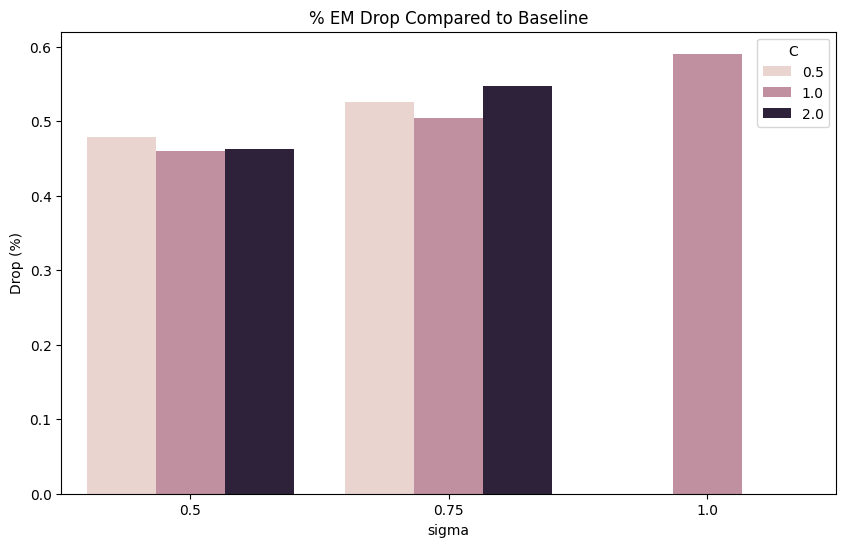

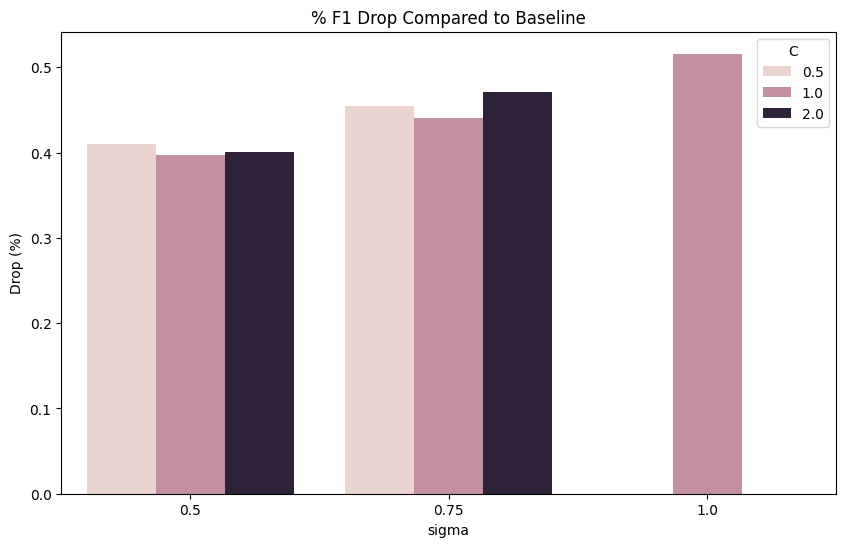

In [ ]:
baseline_em = 0.6347
baseline_f1 = 0.7578

final["em_drop"] = (baseline_em - final["em"]) / baseline_em
final["f1_drop"] = (baseline_f1 - final["f1"]) / baseline_f1

plt.figure(figsize=(10,6))
sns.barplot(data=final, x="sigma", y="em_drop", hue="C")
plt.title("% EM Drop Compared to Baseline")
plt.ylabel("Drop (%)")
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(data=final, x="sigma", y="f1_drop", hue="C")
plt.title("% F1 Drop Compared to Baseline")
plt.ylabel("Drop (%)")
plt.show()


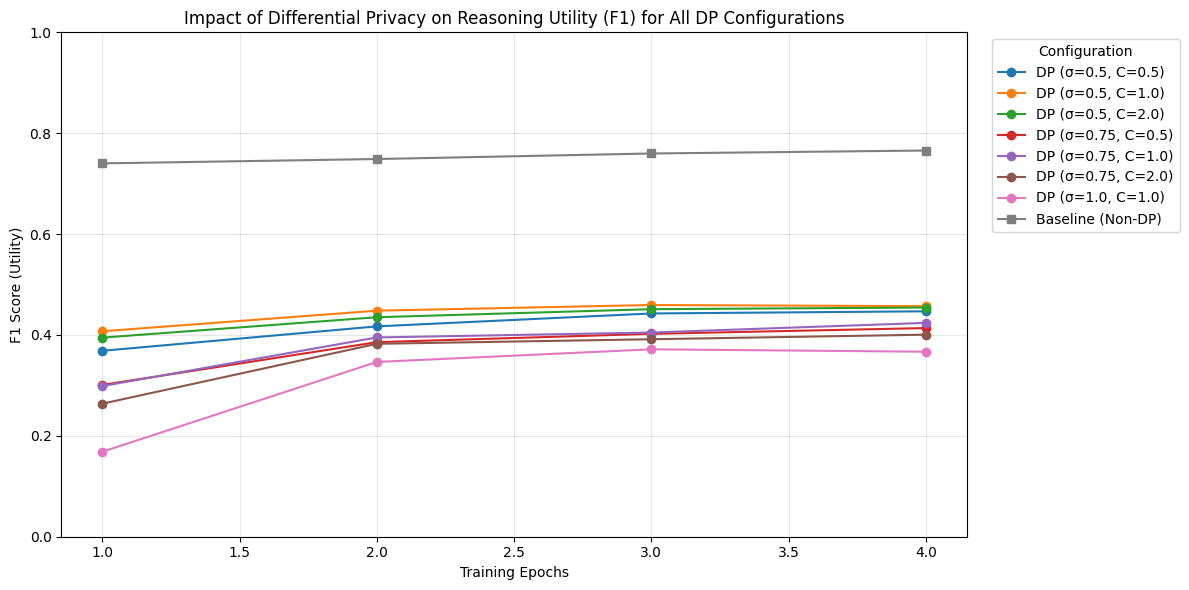

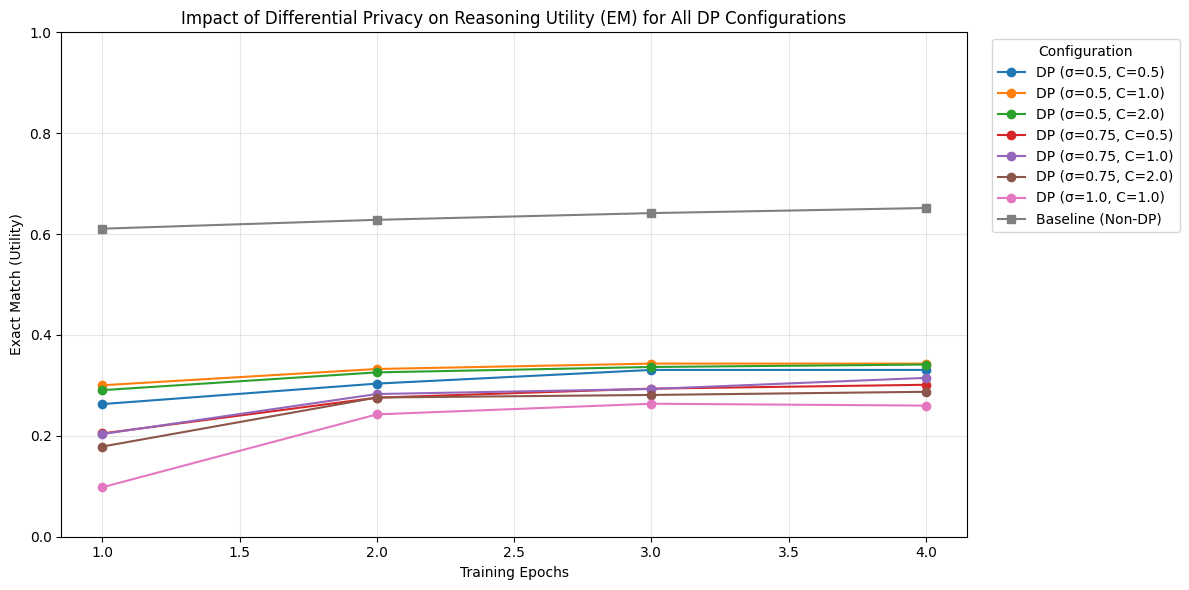

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results_with_baseline.csv")

# Baseline rows (non-DP)
baseline = df[df["run_id"] == "baseline"].sort_values("epoch")

# DP rows (have sigma and C)
dp_df = df[df["run_id"] != "baseline"].dropna(subset=["sigma", "C"])
dp_df["sigma"] = dp_df["sigma"].astype(float)
dp_df["C"] = dp_df["C"].astype(float)


def plot_metric_all(metric: str, pretty_name: str, title_suffix: str):
    """
    metric: 'f1' or 'em'
    pretty_name: y-axis label, e.g. 'F1 Score (Utility)'
    title_suffix: used in the plot title
    """
    plt.figure(figsize=(12, 6))

    # Plot each DP configuration: one line per (sigma, C)
    for (sigma, C), group in dp_df.groupby(["sigma", "C"]):
        group_sorted = group.sort_values("epoch")

        plt.plot(
            group_sorted["epoch"],
            group_sorted[metric],
            marker="o",
            linestyle="-",
            label=f"DP (σ={sigma}, C={C})"
        )

    if not baseline.empty:
        plt.plot(
            baseline["epoch"],
            baseline[metric],
            marker="s",
            linestyle="-",
            label="Baseline (Non-DP)"
        )

    plt.title(f"Impact of Differential Privacy on {title_suffix}")
    plt.xlabel("Training Epochs")
    plt.ylabel(pretty_name)
    plt.ylim(0.0, 1.0)
    plt.grid(True, alpha=0.3)
    plt.legend(title="Configuration", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

plot_metric_all(
    metric="f1",
    pretty_name="F1 Score (Utility)",
    title_suffix="Reasoning Utility (F1) for All DP Configurations"
)

plot_metric_all(
    metric="em",
    pretty_name="Exact Match (Utility)",
    title_suffix="Reasoning Utility (EM) for All DP Configurations"
)
